# Estadística Intereferencial para Data Science e IA

Estadística descriptiva: describe el comportamiento de los datos.

Estadística inferencial: busca predecit características o resultados.

## Poblaciones normales


### Teorema del límite central
Dada una muestra aleatoria suficiente grande de la población, la distribución de las medias seguirá una distribución normal.


### Funciones de muestreo

##### Muestreo aleatorio simple
```py
muestreo_8 = my_data.sample(n=8) #muestreo 8 datos
muestreo_25 = my_data.sample(frac= .25) #muestreo del 25%
```

##### Muestreo sistemático
```py
def systematic_sampling(my_data, step):
    indexes = np.arange(0, len(my_data), step=step)
    systematic_sample = my_data.iloc(indexes)
    return systematic_sample
```

##### Muestreo estratificado
```py
my_data["estratificado"] = my_data["filtro"] + "," + my_data["otro filtro"]
(my_data["estratificado"].value_counts()/len(my_data).sort_values(ascending=False))
```

# Cálculo de estadísticos

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [3]:
# base de datos
names = ["sepal-length", "sepal-width", "petal-length", "petal-width", "class"]
iris = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data", names=names)

In [4]:
iris.head()

,sepal-length,sepal-width,petal-length,petal-width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


(array([ 1.,  3.,  1.,  4.,  2.,  5.,  6., 10.,  9.,  4.,  1.,  6.,  7.,
         6.,  8.,  7.,  3.,  6.,  6., 13.,  0.,  7.,  5.,  2., 11.,  0.,
         4.,  2.,  0.,  4.,  0.,  1.,  1.,  4.,  0.,  1.]),
 array([4.3, 4.4, 4.5, 4.6, 4.7, 4.8, 4.9, 5. , 5.1, 5.2, 5.3, 5.4, 5.5,
        5.6, 5.7, 5.8, 5.9, 6. , 6.1, 6.2, 6.3, 6.4, 6.5, 6.6, 6.7, 6.8,
        6.9, 7. , 7.1, 7.2, 7.3, 7.4, 7.5, 7.6, 7.7, 7.8, 7.9]),
 <BarContainer object of 36 artists>)

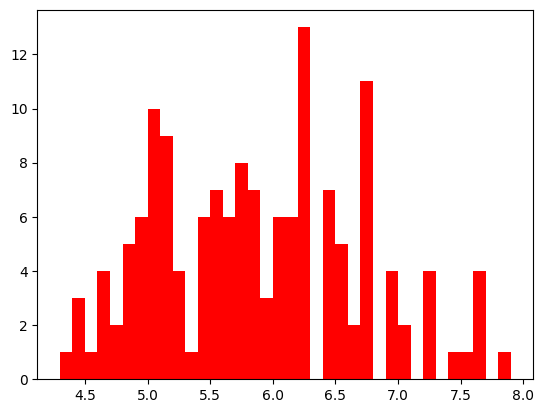

In [9]:
plt.hist(iris["sepal-length"], color="red", bins=int(180/5))

C:\Users\rodri\AppData\Local\Temp\ipykernel_13296\2683833817.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(iris["sepal-length"], hist=True ,kde=True, bins=int(180/5), color="red")


<AxesSubplot: xlabel='sepal-length', ylabel='Density'>

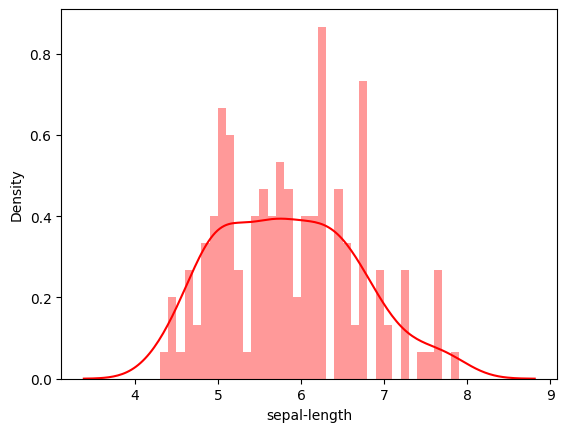

In [16]:
sns.distplot(iris["sepal-length"], hist=True ,kde=True, bins=int(180/5), color="red")

In [17]:
# Varianza
iris["sepal-length"].var()

0.6856935123042507

In [19]:
#ds
iris["sepal-length"].std()

0.828066127977863

In [21]:
#media
iris["sepal-length"].mean()

5.843333333333334

In [22]:
#creación de muestra de toda la población
muestra = iris.sample(frac=0.5)
muestra

,sepal-length,sepal-width,petal-length,petal-width,class
128,6.4,2.8,5.6,2.1,Iris-virginica
31,5.4,3.4,1.5,0.4,Iris-setosa
29,4.7,3.2,1.6,0.2,Iris-setosa
139,6.9,3.1,5.4,2.1,Iris-virginica
44,5.1,3.8,1.9,0.4,Iris-setosa
...,...,...,...,...,...
72,6.3,2.5,4.9,1.5,Iris-versicolor
138,6.0,3.0,4.8,1.8,Iris-virginica
88,5.6,3.0,4.1,1.3,Iris-versicolor
6,4.6,3.4,1.4,0.3,Iris-setosa


In [23]:
# varianza de la muestra
muestra["sepal-length"].var()

0.6674306306306308

In [24]:
#ds
muestra["sepal-length"].std()

0.816964277450753

In [25]:
#media
muestra["sepal-length"].mean()

5.7346666666666675

### Intervalo de confianza

In [27]:
import scipy.stats as st

In [28]:
np.random.seed(20)
var1 = np.random.randint(0, 10, 10) # días de vacaciones
var2 = var1 + np.random.normal(0,1,10) # dinero gastado

In [30]:
var2

array([1.91516741, 9.55969629, 4.93946935, 5.02151896, 7.50309684,
       2.40641447, 0.32346101, 5.50658912, 7.20798321, 4.15763207])

In [40]:
tuple = list(zip(var1, var2))

In [41]:
tabla = pd.DataFrame(tuple, columns = ["Días_vacaciones", "Dinero_gastado"])
tabla

,Días_vacaciones,Dinero_gastado
0,3,1.915167
1,9,9.559696
2,4,4.939469
3,6,5.021519
4,7,7.503097
5,2,2.406414
6,0,0.323461
7,6,5.506589
8,8,7.207983
9,5,4.157632


In [42]:
st.t.interval(alpha = 0.95, df=len(tabla)-1, loc=np.mean(tabla), scale=st.sem(tabla))

c:\Python311\Lib\site-packages\numpy\core\fromnumeric.py:3462: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)
C:\Users\rodri\AppData\Local\Temp\ipykernel_13296\2821511400.py:1: DeprecationWarning: Use of keyword argument 'alpha' for method 'interval' is deprecated and wil be removed in SciPy 1.11.0. Use first positional argument or keyword argument 'confidence' instead.
  st.t.interval(alpha = 0.95, df=len(tabla)-1, loc=np.mean(tabla), scale=st.sem(tabla))


(array([3.00496491, 2.84767315]), array([6.99503509, 6.86053259]))

C:\Users\rodri\AppData\Local\Temp\ipykernel_13296\3336605630.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(tabla, bins=2)


<AxesSubplot: ylabel='Density'>

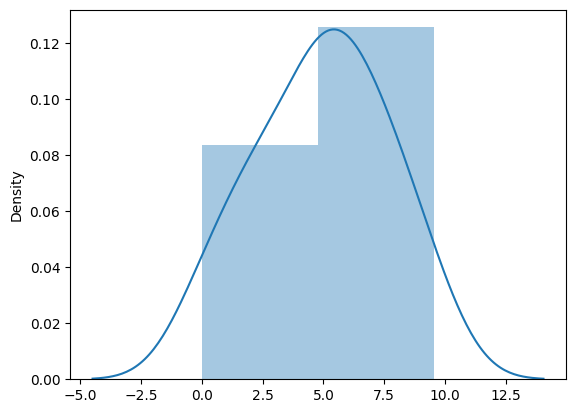

In [44]:
sns.distplot(tabla, bins=2)

# Prueba de hipótesis

Tipos de errores

|                         | $H_{0} $ verdadera         | $H_{0} $ falsa        |
|-------------------------|----------------------------|-----------------------|
|Rechazamos  $H_{0}$      |Error tip I P(I)=$\alpha$   |Decisión correcta      |
|No rechazamos $H_{0}$    |Decisión correcta           |Error tipo II P(II)=$\beta$

### t de Student

$$
SE = \frac{\sigma}{\sqrt{N}}
$$

$$
SED =\sqrt{\frac{\sigma_{1}^{2}}{N_{1}} + \frac{\sigma_{2}^{2}}{N_{2}}}
$$

$$
t = \frac{x_{1}-x{2}}{\sqrt{\frac{\sigma_{1}^{2}}{N_{1}} + \frac{\sigma_{2}^{2}}{N_{2}}}}
$$

In [45]:
from scipy.stats import f_oneway
from scipy.stats import ttest_ind

In [46]:
se_length = iris.std()["sepal-length"]/np.sqrt(10)
se_width = iris.std()["sepal-width"]/np.sqrt(10)

C:\Users\rodri\AppData\Local\Temp\ipykernel_13296\536494697.py:1: FutureWarning: The default value of numeric_only in DataFrame.std is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  se_length = iris.std()["sepal-length"]/np.sqrt(10)
C:\Users\rodri\AppData\Local\Temp\ipykernel_13296\536494697.py:2: FutureWarning: The default value of numeric_only in DataFrame.std is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  se_width = iris.std()["sepal-width"]/np.sqrt(10)


In [47]:
se_length

0.2618575017646526

In [48]:
se_width

0.13711456043966944

In [51]:
sed = np.sqrt(se_length**2 + se_width**2)
sed

0.2955837511010861

In [53]:
t_stat = (iris.mean()["sepal-length"] -iris.mean()["sepal-width"])/sed
t_stat

C:\Users\rodri\AppData\Local\Temp\ipykernel_13296\969500570.py:1: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  t_stat = (iris.mean()["sepal-length"] -iris.mean()["sepal-width"])/sed


9.436693738890318

In [56]:
p = ttest_ind(iris["sepal-length"], iris["sepal-width"])
p

Ttest_indResult(statistic=36.548157693982006, pvalue=3.987838114848222e-112)

Como pvalue es más chico que t_stat concluimos que las distribuciones de las variables sepal-length y sepal-width son diferentes

### Correlación y coeficiente de Pearson

In [58]:
iris["sepal-length"].corr(iris["sepal-width"])

-0.1093692499506493

In [59]:
st.pearsonr(iris["sepal-length"], iris["sepal-width"])

PearsonRResult(statistic=-0.10936924995064938, pvalue=0.18276521527134995)

### Análisis de la varianza (ANOVA)

In [60]:
f_oneway(iris["sepal-length"], iris["sepal-width"])

F_onewayResult(statistic=1335.7678308241748, pvalue=3.98783811484836e-112)

## Bootstrapping
Método de remuestreo de datos dentro de una muestra aleatoria. Se usa para aproximar a la distribución de la variable analizada. Útil para muestras pequeñas o distribuciones sesgadas.

Se saca una muestra de una muestra de una muestra...

In [61]:
data = np.random.normal(loc =34, size=10000)
data

array([32.72049734, 34.24571517, 33.9558052 , ..., 33.4997036 ,
       31.95154722, 32.50619463])

In [62]:
data.mean()

34.01569046435315

In [128]:
from numpy import random
promedio = []
for i in range(40):
    muestra = random.sample(data.tolist(), 5)
    prom = np.mean(muestra)
    promedio.append(prom)

TypeError: random_sample() takes at most 1 positional argument (2 given)

In [126]:
np.mean(promedio)

0.5009407902037036

### Validación cruzada
Técnica para evaluar resultado de un análisis estadístico que son independientes de la partición entre datos de entrenamiento y prueba.